In [42]:
#Importing the necessary packages we will need to run this code
import numpy as np
import matplotlib.pyplot as plt

In [43]:
#ODE is R'=-aR+bJ and J'=bR+aJ a,b, constants and a^2>b^2
def f(Y, t):
    a=-2 # Change a,b here to see how modifying these variables affects the phase plane
    b=1 
    y1, y2 = Y
    return [a*y1+b*y2, b*y1+a*y2]

In [44]:
#Next several cells are defining a meshgrid over which we will solve for the phase plane
#You can display what is in these arrays using display(y1) for example
y1 = np.linspace(-2.0, 2.0, 20)
y2 = np.linspace(-2.0,2.0, 20)

In [45]:
Y1, Y2 = np.meshgrid(y1, y2)

In [46]:
t = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape

In [47]:
#Calculating the derivatives R(y1)', J(y2)' at each point in the phase plane so that we can make a phase plane plot
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t) #Returns an array of y1' and y2' 
        u[i,j] = yprime[0] #y1'
        v[i,j] = yprime[1] #y2'
     

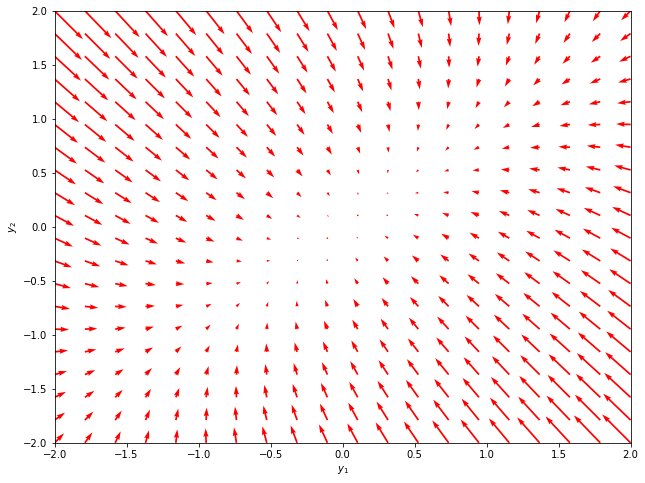

In [48]:
fig1=plt.figure(figsize=(1,1.5))
ax1=fig1.add_axes([0.,0.,8.,4.])
#Quiver plots an arrow describing the magnitude and direction at each point, that is 
#y1'/y2' which is u/v
Q=ax1.quiver(Y1, Y2, u, v, color='r') 
ax1.set_xlabel('$y_1$')
ax1.set_ylabel('$y_2$')
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
fig1.savefig('phase-portrait.png')




In [49]:
#Need odeint
from scipy.integrate import odeint

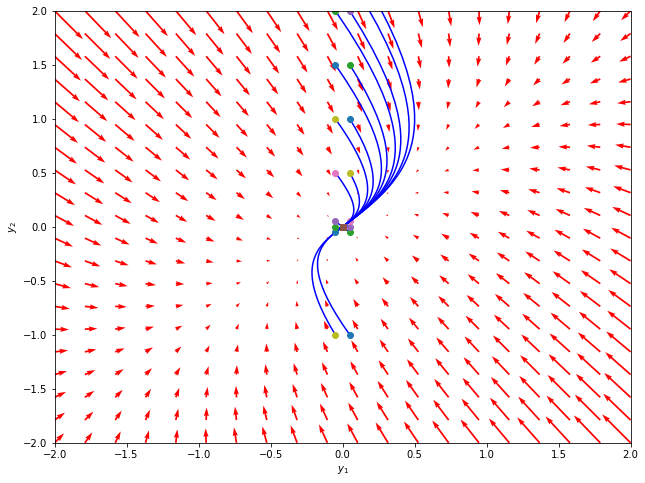

In [50]:
#This cell plots trajectories over the quiver plot by actually numerically solving the system of ODEs using odeint
ax2=fig1.add_axes([0.,0.,8.,4.])

for y20 in [-1.0,-.05, 0,0.05, 0.5, 1, 1.5, 2, 2.5]: #Different initial starting conditions. y1 is always 1.5, y2 starts at 0-2.5
    tspan = np.linspace(0, 10, 200) #time
    y0 = [0.05, y20]
    ys = odeint(f, y0, tspan)
    ax2.plot(ys[:,0], ys[:,1], 'b-') # path
    ax2.plot([ys[0,0]], [ys[0,1]], 'o') # start (initial condition) denoted with a o on the plot
    ax2.plot([ys[-1,0]], [ys[-1,1]], 's') # end (at t=200) denoted by a square on the plot
    ax2.set_xlim([-2, 2])


for y20 in [-1.0,-.05, 0,0.05, 0.5, 1, 1.5, 2, 2.5]: #Different initial starting conditions. y1 is always 1.5, y2 starts at 0-2.5
    tspan = np.linspace(0, 10, 200) #time
    y0 = [-0.05, y20]
    ys = odeint(f, y0, tspan)
    ax2.plot(ys[:,0], ys[:,1], 'b-') # path
    ax2.plot([ys[0,0]], [ys[0,1]], 'o') # start (initial condition) denoted with a o on the plot
    ax2.plot([ys[-1,0]], [ys[-1,1]], 's') # end (at t=200) denoted by a square on the plot
    ax2.set_xlim([-2, 2])
fig1.savefig('phase-portrait-2.png')
fig1.savefig('myplot2.png', bbox_inches='tight')
fig1.savefig('myplot.eps', bbox_inches='tight')
fig1

In [ ]:
#What do these look like in time?
fig2=plt.figure(figsize=(1,1.5))
